In [ ]:
from google.colab import files
import pandas as pd
import os

# Step 1: Load the dataset into the drive. Check the correct dataset file name.
file_name = "/content/LUAD_ANOVA_Sun Jan 26 16_02_06 2025.csv"  # Replace with the correct name if different
data = pd.read_csv(file_name)

# Step 2: Display the first few rows of the dataset
print(data.head())


      Drug name  Drug ID Drug target   Target Pathway Feature Name  \
0  Camptothecin     1003        TOP1  DNA replication   ARID1A_mut   
1  Camptothecin     1003        TOP1  DNA replication     EGFR_mut   
2  Camptothecin     1003        TOP1  DNA replication      KDR_mut   
3  Camptothecin     1003        TOP1  DNA replication     KRAS_mut   
4  Camptothecin     1003        TOP1  DNA replication      MGA_mut   

   n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_pos  \
0              4             58          0.177968          -1.315282   
1              6             56          0.352381          -1.089806   
2              3             59          0.892665          -2.816777   
3             21             41          0.151599          -1.715088   
4              3             59          0.154535          -1.344328   

   log_ic50_mean_neg  ...  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -1.582200  ...             0.619798                 0.266918

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Step 9: Display the column names to understand the features and labels
print("Column names in the dataset:")
print(data.columns)

# Step 10: Separate features and labels (choosing the correct target column)
# Replace 'log_ic50_mean_pos' with the actual target column you want to use
target_column = 'log_ic50_mean_pos'  # Choose the correct target column

# Ensure the target column exists in the dataset
if target_column in data.columns:
    features = data.drop([target_column], axis=1)  # Drop the target column to get features
    labels = data[target_column]  # Extract the target column
    print("Features and labels separated successfully.")

    # Step 11: Display the shape of the features and labels
    print(f"Features shape: {features.shape}")
    print(f"Labels shape: {labels.shape}")
else:
    print(f"'{target_column}' column not found. Please check the dataset.")


      Drug name  Drug ID Drug target   Target Pathway Feature Name  \
0  Camptothecin     1003        TOP1  DNA replication   ARID1A_mut   
1  Camptothecin     1003        TOP1  DNA replication     EGFR_mut   
2  Camptothecin     1003        TOP1  DNA replication      KDR_mut   
3  Camptothecin     1003        TOP1  DNA replication     KRAS_mut   
4  Camptothecin     1003        TOP1  DNA replication      MGA_mut   

   n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_pos  \
0              4             58          0.177968          -1.315282   
1              6             56          0.352381          -1.089806   
2              3             59          0.892665          -2.816777   
3             21             41          0.151599          -1.715088   
4              3             59          0.154535          -1.344328   

   log_ic50_mean_neg  ...  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -1.582200  ...             0.619798                 0.266918

In [ ]:
# Sample size
num_samples = data.shape[0]
print(f"Number of samples: {num_samples}")

# Assuming each row corresponds to a specific cell line and drug pair
# If there's a specific column for drug identifiers, use it
num_drugs = data['Drug_ID'].nunique() if 'Drug_ID' in data.columns else "Unknown"
print(f"Number of unique drugs tested: {num_drugs}")


Number of samples: 10777
Number of unique drugs tested: Unknown


In [ ]:
# Summary statistics for the features
print(features.describe())

# Summary statistics for the labels
print(labels.describe())


            Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  \
count  10777.000000   10777.000000   10777.000000      10777.000000   
mean    1599.222975       8.098543      47.298599          0.374480   
std      397.242617       8.390045      11.080362          0.312293   
min     1003.000000       3.000000       4.000000          0.000031   
25%     1168.000000       4.000000      43.000000          0.137112   
50%     1635.000000       5.000000      49.000000          0.295901   
75%     1912.000000       8.000000      56.000000          0.534584   
max     2499.000000      51.000000      59.000000          3.281896   

       log_ic50_mean_neg  log_max_conc_tested  log_max_conc_tested_2  \
count       10777.000000                  0.0                    0.0   
mean            3.344437                  NaN                    NaN   
std             2.372629                  NaN                    NaN   
min            -5.332687                  NaN                    NaN   


Missing values in each column:
Drug name                      0
Drug ID                        0
Drug target                 1314
Target Pathway                66
Feature Name                   0
n_feature_pos                  0
n_feature_neg                  0
ic50_effect_size               0
log_ic50_mean_pos              0
log_ic50_mean_neg              0
log_max_conc_tested        10777
log_max_conc_tested_2      10777
feature_ic50_t_pval            0
feature_delta_mean_ic50        0
feature_pos_ic50_var           0
feature_neg_ic50_var           0
feature_pval                   0
tissue_pval                10777
msi_pval                   10777
fdr                            0
Tissue Type                    0
Screening Set                  0
dtype: int64


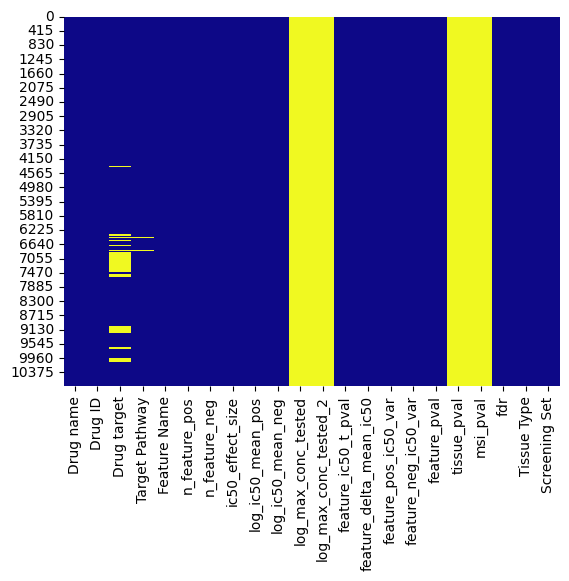

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optionally, visualize missing data if any
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.show()


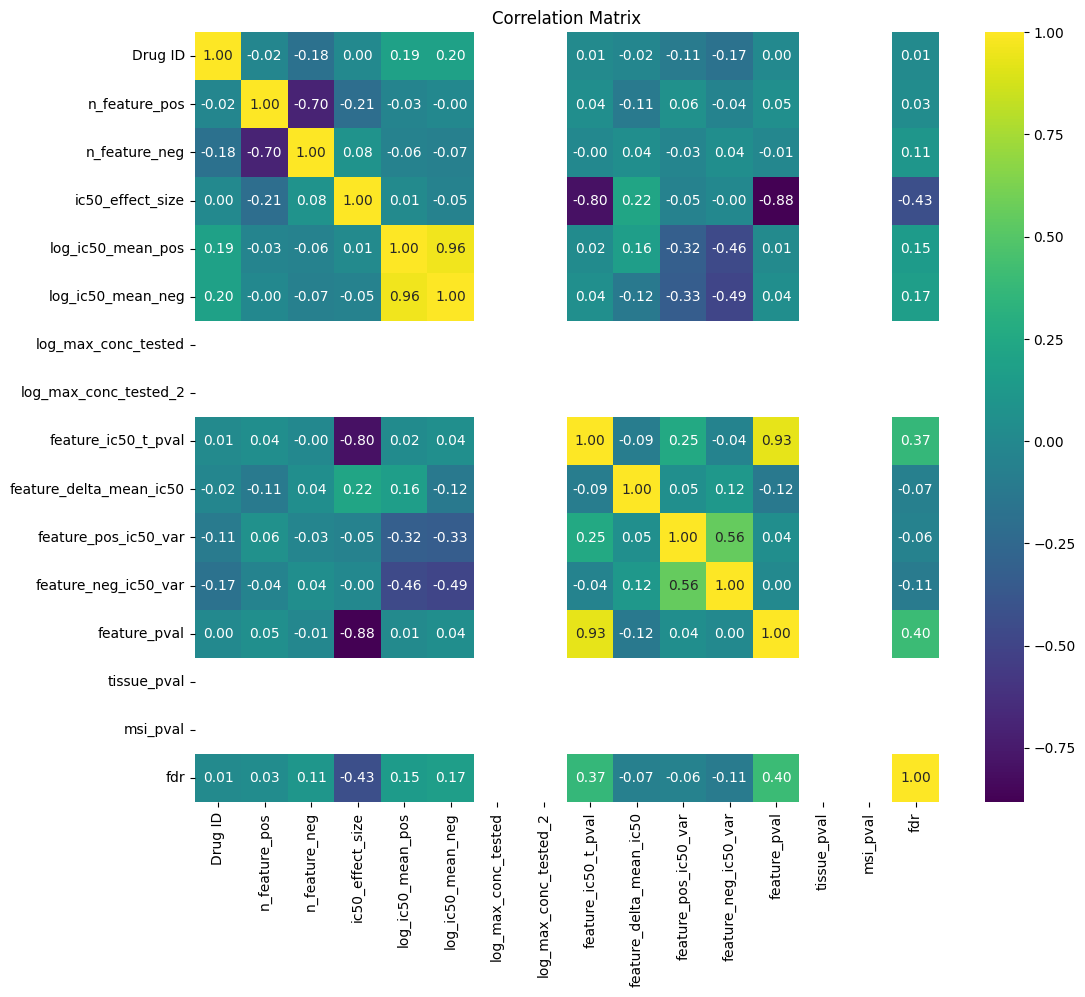

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
# Custom palette with shades of blue and red
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')  # Using 'viridis' palette
plt.title('Correlation Matrix')
plt.show()



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_features = features.select_dtypes(include=[float, int])
non_numeric_features = features.select_dtypes(exclude=[float, int])

# Identify columns with all missing values and drop them
columns_to_drop = numeric_features.columns[numeric_features.isnull().all()]
print(f"Columns with all missing values: {columns_to_drop.tolist()}")
numeric_features = numeric_features.drop(columns=columns_to_drop)

# Impute missing data in numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
numeric_features_imputed = imputer_numeric.fit_transform(numeric_features)

# Convert the imputed numeric features back to a DataFrame
numeric_features_imputed_df = pd.DataFrame(numeric_features_imputed, columns=numeric_features.columns)

# Optionally, handle missing data in non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
non_numeric_features_imputed = imputer_non_numeric.fit_transform(non_numeric_features)

# Convert the imputed non-numeric features back to a DataFrame
non_numeric_features_imputed_df = pd.DataFrame(non_numeric_features_imputed, columns=non_numeric_features.columns)

# Combine the numeric and non-numeric data back into one DataFrame
features_imputed = pd.concat([numeric_features_imputed_df, non_numeric_features_imputed_df], axis=1)

# Impute missing values in the labels (if necessary)
labels_imputed = labels.fillna(labels.mean())  # Or use other imputation strategies

# Display the result
print(features_imputed.head())
print(labels_imputed.head())


Columns with all missing values: ['log_max_conc_tested', 'log_max_conc_tested_2', 'tissue_pval', 'msi_pval']
   Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_neg  \
0   1003.0            4.0           58.0          0.177968          -1.582200   
1   1003.0            6.0           56.0          0.352381          -1.615891   
2   1003.0            3.0           59.0          0.892665          -1.501329   
3   1003.0           21.0           41.0          0.151599          -1.488096   
4   1003.0            3.0           59.0          0.154535          -1.576200   

   feature_ic50_t_pval  feature_delta_mean_ic50  feature_pos_ic50_var  \
0             0.619798                 0.266918              0.915196   
1             0.275493                 0.526086              0.979272   
2             0.244384                -1.315448              1.412511   
3             0.578186                -0.226992              1.520449   
4             0.831132                 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_features = features_imputed.select_dtypes(include=[float, int])
non_numeric_features = features_imputed.select_dtypes(exclude=[float, int])

# Standardize the numeric features (mean=0, variance=1)
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Convert the scaled numeric features back to a DataFrame
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# Recombine the scaled numeric features with the non-numeric features
features_scaled = pd.concat([numeric_features_scaled_df, non_numeric_features.reset_index(drop=True)], axis=1)

# Display the first few rows of the scaled features
print(features_scaled.head())


    Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  \
0 -1.500973      -0.488523       0.965844         -0.629287   
1 -1.500973      -0.250135       0.785336         -0.070768   
2 -1.500973      -0.607718       1.056098          1.659369   
3 -1.500973       1.537781      -0.568473         -0.713726   
4 -1.500973      -0.607718       1.056098         -0.704323   

   log_ic50_mean_neg  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -2.076543             0.414458                 0.271307   
1          -2.090743            -0.751670                 0.658605   
2          -2.042456            -0.857034                -2.093366   
3          -2.036878             0.273522                -0.466787   
4          -2.074013             1.130226                 0.218934   

   feature_pos_ic50_var  feature_neg_ic50_var  feature_pval       fdr  \
0             -0.547827              0.473986      0.794805 -0.207396   
1             -0.435942              0.489418     -0.2

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure only numeric columns are used for feature selection
numeric_features_scaled = features_scaled.select_dtypes(include=[float, int])

# Example: Select all available features
selector = SelectKBest(score_func=f_classif, k='all')
features_selected = selector.fit_transform(numeric_features_scaled, labels_imputed)

# Get the names of the selected features
selected_features = numeric_features_scaled.columns[selector.get_support(indices=True)]
features_selected_df = pd.DataFrame(features_selected, columns=selected_features)

print("Selected features using ANOVA F-test:")
print(selected_features)


Selected features using ANOVA F-test:
Index(['Drug ID', 'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_neg', 'feature_ic50_t_pval', 'feature_delta_mean_ic50',
       'feature_pos_ic50_var', 'feature_neg_ic50_var', 'feature_pval', 'fdr'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Ensure only numeric columns are used for PCA
numeric_features_scaled = features_scaled.select_dtypes(include=[float, int])

# Adjust the number of components if necessary
n_components = min(20, numeric_features_scaled.shape[1])

# Apply PCA
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(numeric_features_scaled)

# Convert the PCA components back to a DataFrame
features_pca_df = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

print("Explained variance by each principal component:")
print(pca.explained_variance_ratio_)



Explained variance by each principal component:
[0.27877304 0.18784743 0.15746775 0.0906011  0.08281253 0.06649388
 0.05903635 0.03991823 0.02392837 0.01157368 0.00154763]


In [ ]:
# List all column names to verify the target column name
print(data.columns)


Index(['Drug name', 'Drug ID', 'Drug target', 'Target Pathway', 'Feature Name',
       'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_pos', 'log_ic50_mean_neg', 'log_max_conc_tested',
       'log_max_conc_tested_2', 'feature_ic50_t_pval',
       'feature_delta_mean_ic50', 'feature_pos_ic50_var',
       'feature_neg_ic50_var', 'feature_pval', 'tissue_pval', 'msi_pval',
       'fdr', 'Tissue Type', 'Screening Set'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

def preprocess_data(data, target_column, feature_selection_method='PCA', n_features=20):
    # Check if the target column exists
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in the dataset. Available columns: {data.columns.tolist()}")

    # Separate features and labels
    features = data.drop([target_column], axis=1)
    labels = data[target_column]

    # Drop columns with all missing values
    features = features.dropna(axis=1, how='all')

    # Separate numeric and non-numeric columns
    numeric_features = features.select_dtypes(include=[float, int])
    non_numeric_features = features.select_dtypes(exclude=[float, int])

    # Impute missing data in numeric columns
    imputer = SimpleImputer(strategy='mean')
    numeric_features_imputed = imputer.fit_transform(numeric_features)

    # Convert imputed numeric features back to a DataFrame
    numeric_features_imputed_df = pd.DataFrame(numeric_features_imputed, columns=numeric_features.columns)

    # Recombine imputed numeric features with non-numeric features
    features_imputed = pd.concat([numeric_features_imputed_df, non_numeric_features.reset_index(drop=True)], axis=1)

    # Impute missing values in the labels (if necessary)
    labels_imputed = labels.fillna(labels.mean())

    # Normalize/Scale the numeric features
    scaler = StandardScaler()
    numeric_features_scaled = scaler.fit_transform(numeric_features_imputed_df)

    # Recombine scaled numeric features with non-numeric features
    features_scaled = pd.concat([pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns),
                                 non_numeric_features.reset_index(drop=True)], axis=1)

    # Feature selection
    if feature_selection_method == 'ANOVA':
        selector = SelectKBest(score_func=f_classif, k=n_features)
        features_selected = selector.fit_transform(numeric_features_scaled, labels_imputed)
        selected_features = numeric_features.columns[selector.get_support(indices=True)]
        features_final = pd.DataFrame(features_selected, columns=selected_features)
    elif feature_selection_method == 'PCA':
        n_components = min(n_features, numeric_features_scaled.shape[1])
        pca = PCA(n_components=n_components)
        features_pca = pca.fit_transform(numeric_features_scaled)
        features_final = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

    return features_final, labels_imputed

# Example usage with the correct target column
features_final, labels_final = preprocess_data(data, target_column='log_ic50_mean_pos', feature_selection_method='PCA', n_features=20)

# Display the resulting DataFrames
print(features_final.head())
print(labels_final.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.546432  1.770032  1.069098 -0.995310  0.892998 -1.204841 -1.321426   
1 -1.032545  1.679534  0.609499 -0.953496  1.130680 -0.776794 -1.318244   
2 -2.319454  1.556410  0.590601 -2.582863 -1.274006 -0.350466 -0.713041   
3  0.635241  1.765680 -1.618938 -1.525236  0.599746 -0.690588 -0.830064   
4  1.141068  2.487801  1.085904 -0.756069  0.523542 -1.080180 -0.515173   

        PC8       PC9      PC10      PC11  
0 -0.128233 -0.012827  0.004008  0.016163  
1 -0.146376  0.179465 -0.387653  0.079151  
2 -0.936148 -0.378850  0.565131 -0.128459  
3 -0.659148  0.261115 -0.122472 -0.047996  
4 -0.807349 -0.074454  0.010744  0.008963  
0   -1.315282
1   -1.089806
2   -2.816777
3   -1.715088
4   -1.344328
Name: log_ic50_mean_pos, dtype: float64


In [ ]:
import torch.nn as nn
import random

# Define the search space as a dictionary
search_space = {
    'layer_types': ['dense', 'conv', 'recurrent'],  # Types of layers
    'layer_sizes': [32, 64, 128, 256],             # Number of neurons or filters
    'activation_functions': ['relu', 'sigmoid', 'tanh'],  # Activation functions
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]          # Dropout rates for regularization
}

# Function to sample a random architecture from the search space
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    # Example: A simple architecture with 3 layers
    for _ in range(3):
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture

# Example of sampling a random architecture
sampled_architecture = sample_architecture(search_space)
print("Sampled Architecture:")
print(sampled_architecture)


Sampled Architecture:
{'layers': [{'type': 'dense', 'size': 256}, {'type': 'dense', 'size': 64}, {'type': 'recurrent', 'size': 32}], 'activation_functions': ['tanh', 'tanh', 'relu'], 'dropout_rates': [0.3, 0.2, 0.3]}


In [ ]:
import torch
import torch.nn as nn

# Function to build a model based on the sampled architecture
class CustomModel(nn.Module):
    def __init__(self, architecture):
        super(CustomModel, self).__init__()
        layers = []
        input_size = 100  # Example input size, you should adjust this based on your dataset

        for i, layer in enumerate(architecture['layers']):
            layer_type = layer['type']
            layer_size = layer['size']
            activation_function = architecture['activation_functions'][i]
            dropout_rate = architecture['dropout_rates'][i]

            if layer_type == 'dense':
                layers.append(nn.Linear(input_size, layer_size))
                input_size = layer_size  # Update input size for the next layer
            elif layer_type == 'conv':
                layers.append(nn.Conv2d(in_channels=1, out_channels=layer_size, kernel_size=3, padding=1))
                layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
                input_size = layer_size  # This needs to be updated according to the output size of conv layers
            elif layer_type == 'recurrent':
                layers.append(nn.LSTM(input_size, layer_size, batch_first=True))
                input_size = layer_size

            # Add activation function
            if activation_function == 'relu':
                layers.append(nn.ReLU())
            elif activation_function == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation_function == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout
            layers.append(nn.Dropout(p=dropout_rate))

        # Output layer
        layers.append(nn.Linear(input_size, 10))  # Example output size is 10

        # Combine all layers
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Instantiate the model with the sampled architecture
model = CustomModel(sampled_architecture)

# Print model architecture
print(model)


CustomModel(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.2, inplace=False)
    (6): LSTM(64, 32, batch_first=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [ ]:
!pip install scikit-optimize


In [ ]:
# Install scikit-optimize
!pip install scikit-optimize

# Now you can run your main code
import random
import numpy as np
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real

# Define the search space
search_space = {
    'layer_types': ['dense', 'conv', 'recurrent'],
    'layer_sizes': [32, 64, 128, 256],
    'activation_functions': ['relu', 'sigmoid', 'tanh'],
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]
}

# Placeholder evaluation function
def evaluate_architecture(architecture):
    # Simulate an evaluation score between 0 and 1
    return random.uniform(0, 1)  # Replace with actual model evaluation logic

# Random Search
def random_search(search_space, num_samples=10):
    best_architecture = None
    best_score = float('-inf')

    for _ in range(num_samples):
        architecture = sample_architecture(search_space)
        score = evaluate_architecture(architecture)

        if score > best_score:
            best_score = score
            best_architecture = architecture

    return best_architecture, best_score

# Reinforcement Learning (Q-Learning) NAS
class QLearningNAS:
    def __init__(self, search_space, num_episodes=10, learning_rate=0.1, discount_factor=0.9):
        self.search_space = search_space
        self.q_table = {}
        self.num_episodes = num_episodes
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

    def choose_action(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(len(self.search_space['layer_sizes']))

        if random.uniform(0, 1) < 0.1:  # Exploration
            action = random.choice(range(len(self.search_space['layer_sizes'])))
        else:  # Exploitation
            action = np.argmax(self.q_table[state])

        return action

    def update_q_value(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table.get(next_state, np.zeros(len(self.search_space['layer_sizes']))))
        td_target = reward + self.discount_factor * self.q_table.get(next_state, np.zeros(len(self.search_space['layer_sizes'])))[best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

    def train(self):
        best_architecture = None
        best_score = float('-inf')

        for episode in range(self.num_episodes):
            state = tuple(random.choice(self.search_space[key]) for key in self.search_space)
            action = self.choose_action(state)
            architecture = {
                'layers': [{'type': 'dense', 'size': self.search_space['layer_sizes'][action]}],
                'activation_functions': [random.choice(self.search_space['activation_functions'])],
                'dropout_rates': [random.choice(self.search_space['dropout_rates'])]
            }
            score = evaluate_architecture(architecture)
            reward = score

            if score > best_score:
                best_score = score
                best_architecture = architecture

            next_state = state  # In more complex cases, update this
            self.update_q_value(state, action, reward, next_state)

        return best_architecture, best_score

# Bayesian Optimization
def bayesian_optimization(search_space, n_calls=10):
    space = [
        Categorical(search_space['layer_types'], name='layer_type'),
        Integer(32, 256, name='layer_size'),
        Categorical(search_space['activation_functions'], name='activation_function'),
        Real(0.2, 0.5, name='dropout_rate')
    ]

    def objective(params):
        architecture = {
            'layers': [{'type': params[0], 'size': params[1]}],
            'activation_functions': [params[2]],
            'dropout_rates': [params[3]]
        }
        score = evaluate_architecture(architecture)
        return -score  # Negating because gp_minimize minimizes

    result = gp_minimize(objective, space, n_calls=n_calls, random_state=42)

    best_params = result.x
    best_architecture = {
        'layers': [{'type': best_params[0], 'size': best_params[1]}],
        'activation_functions': [best_params[2]],
        'dropout_rates': [best_params[3]]
    }

    return best_architecture, -result.fun

# Helper function to sample an architecture
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    for _ in range(3):  # Example with 3 layers
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture

# Main function to run the selected strategy
def main():
    print("Choose a NAS strategy:")
    print("1. Random Search")
    print("2. Reinforcement Learning (Q-Learning)")
    print("3. Bayesian Optimization")
    choice = input("Enter the number of the chosen strategy: ")

    if choice == '1':
        architecture, score = random_search(search_space)
    elif choice == '2':
        q_learning_nas = QLearningNAS(search_space)
        architecture, score = q_learning_nas.train()
    elif choice == '3':
        architecture, score = bayesian_optimization(search_space)
    else:
        print("Invalid choice")
        return

    print(f"Best Architecture: {architecture}")
    print(f"Best Score: {score}")

if __name__ == "__main__":
    main()


Choose a NAS strategy:
1. Random Search
2. Reinforcement Learning (Q-Learning)
3. Bayesian Optimization
Enter the number of the chosen strategy: 2
Best Architecture: {'layers': [{'type': 'dense', 'size': 32}], 'activation_functions': ['tanh'], 'dropout_rates': [0.4]}
Best Score: 0.9121165526369811


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming the search space is defined as before
search_space = {
    'layer_types': ['dense', 'conv'],
    'layer_sizes': [32, 64, 128, 256],
    'activation_functions': ['relu', 'sigmoid', 'tanh'],
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]
}

# Reusing the sample_architecture function
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    for _ in range(3):  # Example with 3 layers
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture


In [ ]:
# Define a neural network class that takes architecture as input
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            elif layer['type'] == 'conv':
                # Assuming input is 1D, you can adapt this for 2D if necessary
                layers.append(nn.Conv1d(in_features, layer['size'], kernel_size=3, stride=1, padding=1))
                layers.append(nn.MaxPool1d(kernel_size=2, stride=2))
                in_features = layer['size']

            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        layers.append(nn.Linear(in_features, 1))  # Output layer for regression
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Function to train and evaluate the model
def train_and_evaluate(architecture, X_train, y_train, X_val, y_val, num_epochs=50, batch_size=32):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = NeuralNet(architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation on validation set
    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor).numpy()
        mse = mean_squared_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)

    return mse, r2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    # First layer should be either dense or conv
    first_layer_type = random.choice(['dense', 'conv'])
    first_layer_size = random.choice(search_space['layer_sizes'])
    architecture['layers'].append({'type': first_layer_type, 'size': first_layer_size})
    architecture['activation_functions'].append(random.choice(search_space['activation_functions']))
    architecture['dropout_rates'].append(random.choice(search_space['dropout_rates']))

    for _ in range(2):  # Add 2 more layers
        # Ensure the next layer type matches the current flow (either all dense or all conv)
        if architecture['layers'][-1]['type'] == 'dense':
            next_layer_type = 'dense'
        else:
            next_layer_type = 'conv'

        layer_size = random.choice(search_space['layer_sizes'])
        architecture['layers'].append({'type': next_layer_type, 'size': layer_size})
        architecture['activation_functions'].append(random.choice(search_space['activation_functions']))
        architecture['dropout_rates'].append(random.choice(search_space['dropout_rates']))

    return architecture


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size
        conv_out_size = None

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            elif layer['type'] == 'conv':
                if i == 0:
                    layers.append(nn.Conv1d(in_channels=1, out_channels=layer['size'], kernel_size=3, padding=1))
                else:
                    layers.append(nn.Conv1d(in_channels=in_features, out_channels=layer['size'], kernel_size=3, padding=1))
                layers.append(nn.ReLU())
                layers.append(nn.MaxPool1d(kernel_size=2))
                in_features = layer['size']  # Update to the number of output channels

            # Add activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Flatten if needed before final dense layer
        if 'conv' in [layer['type'] for layer in architecture['layers']]:
            layers.append(nn.Flatten())

        layers.append(nn.Linear(in_features, 1))  # Output layer for regression
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            else:
                raise ValueError("Unsupported layer type")

            # Activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Output layer for regression
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)  # Remove the extra dimension


In [ ]:
def train_and_evaluate(architecture, X_train, y_train, X_val, y_val, num_epochs=50, batch_size=32):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = NeuralNet(architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation on validation set
    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor).numpy()
        mse = mean_squared_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)

    return mse, r2


In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming NeuralNet class and train_and_evaluate function are already defined

def retrain_best_model(best_architecture, X_train, y_train, X_test, y_test, num_epochs=50, batch_size=32):
    """
    Retrains the best model on the full training dataset and evaluates it on the test set.
    """
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model with the best architecture
    input_size = X_train.shape[1]
    model = NeuralNet(best_architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Final evaluation on test set
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

    return mse, r2, model

# Example usage
if __name__ == "__main__":
    # Example random dataset
    X, y = np.random.rand(1000, 20), np.random.rand(1000)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Assuming the best architecture is found from the iterative search process
    best_architecture = {
        'layers': [{'type': 'dense', 'size': 128}, {'type': 'dense', 'size': 64}, {'type': 'dense', 'size': 32}],
        'activation_functions': ['relu', 'relu', 'tanh'],
        'dropout_rates': [0.3, 0.3, 0.2]
    }

    print(f"Best Architecture: {best_architecture}")

    # Retrain and evaluate the best model
    mse, r2, final_model = retrain_best_model(best_architecture, X_train, y_train, X_test, y_test)
    print(f"Final Test MSE: {mse}")
    print(f"Final Test R-squared: {r2}")


Best Architecture: {'layers': [{'type': 'dense', 'size': 128}, {'type': 'dense', 'size': 64}, {'type': 'dense', 'size': 32}], 'activation_functions': ['relu', 'relu', 'tanh'], 'dropout_rates': [0.3, 0.3, 0.2]}


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Final Test MSE: 0.08543688756466276
Final Test R-squared: -0.02003742204736514


In [ ]:
pip install shap


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            else:
                raise ValueError("Unsupported layer type")

            # Activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Output layer for regression
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)  # Ensure the output shape is (batch_size, 1)


In [ ]:
def interpret_model_with_shap(model, X_test, feature_names=None):
    """
    Interpret the model using SHAP values.
    """
    # Convert the model to use with SHAP
    model.eval()  # Set the model to evaluation mode
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Define a SHAP explainer using the model's prediction method
    explainer = shap.DeepExplainer(model, X_test_tensor)
    shap_values = explainer.shap_values(X_test_tensor)

    # Squeeze the SHAP values if necessary
    if isinstance(shap_values, list):
        shap_values = [val.squeeze(-1) for val in shap_values]
    else:
        shap_values = shap_values.squeeze(-1)

    # Plot SHAP values for feature importance
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
from sklearn.model_selection import KFold

def validate_model_cross_validation(model, X, y, n_splits=5, num_epochs=50, batch_size=32):
    """
    Validate the model using K-Fold cross-validation.
    """
    kf = KFold(n_splits=n_splits)
    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Retrain the model on the current fold
        mse, r2, _ = retrain_best_model(best_architecture, X_train, y_train, X_val, y_val, num_epochs=num_epochs, batch_size=batch_size)

        mse_scores.append(mse)
        r2_scores.append(r2)

    # Calculate average performance metrics across all folds
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    return avg_mse, avg_r2

# Example usage
if __name__ == "__main__":
    # Assuming X and y are the full dataset
    # Validate using 5-fold cross-validation
    avg_mse, avg_r2 = validate_model_cross_validation(final_model, X, y, n_splits=5)
    print(f"Average MSE: {avg_mse}")
    print(f"Average R-squared: {avg_r2}")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

Average MSE: 0.0823459572504693
Average R-squared: -0.00730359375665941


In [ ]:
import torch

# Function to save the model
def save_model(model, path="best_model.pth"):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

# Example usage
if __name__ == "__main__":
    save_model(final_model, "best_model.pth")


Model saved to best_model.pth


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return mse, rmse, mae, r2

# Example usage after training models
# y_true = actual target values
# y_pred = predicted values from the model
# evaluate_model(y_true, y_pred)